In [4]:
root_path = './dataset/'

In [5]:
import os
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm

IMAGE_DIR = root_path + 'new_2019_images'
panda_path = root_path + 'new_2019.csv'

In [6]:
data = pd.read_csv(panda_path)

def load_images(data, base_path, img_size=(224, 224)):
    images = []
    labels = []

    for i, row in tqdm(data.iterrows(), total=data.shape[0], desc="Loading Images"):
        img_path = os.path.join(base_path, row['image'] + '.jpg')
        img = cv2.imread(img_path)
        img = cv2.resize(img, img_size)
        images.append(img)

        # Assuming binary classification for now
        labels.append(row[1:].values.argmax())

    return np.array(images), np.array(labels)

# Replace 'path_to_images_folder' with the path to your images folder
images, labels = load_images(data, IMAGE_DIR)

Loading Images:   0%|          | 0/11987 [00:00<?, ?it/s]

Loading Images: 100%|██████████| 11987/11987 [06:26<00:00, 31.04it/s]


In [7]:
# Flatten the images for simplicity
X = images.reshape(images.shape[0], -1)
y = labels

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Train the SVM
svm_model = SVC(kernel='rbf', gamma='scale')
svm_model.fit(X_train, y_train)  # Train the model

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

# Compute overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

KeyboardInterrupt: 

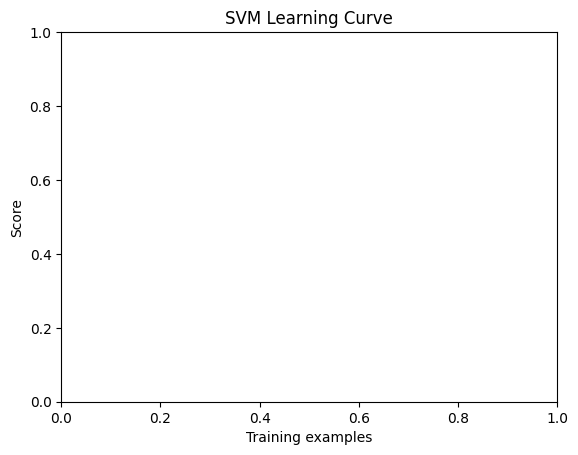

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot the learning curve for your SVM model
plot_learning_curve(SVC(kernel='rbf', gamma='scale'), "SVM Learning Curve", X_train, y_train, cv=5)
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def get_roc_curve(labels, predicted_vals, generator):
    auc_roc_vals = []
    for i in range(len(labels)):
        try:
            gt = generator.labels[:, i]
            pred = predicted_vals[:, i]
            auc_roc = roc_auc_score(gt, pred)
            auc_roc_vals.append(auc_roc)
            fpr_rf, tpr_rf, _ = roc_curve(gt, pred)
            plt.figure(1, figsize=(10, 10))
            plt.plot([0, 1], [0, 1], 'k--')
            plt.plot(fpr_rf, tpr_rf,
                     label=labels[i] + " (" + str(round(auc_roc, 3)) + ")")
            plt.xlabel('False positive rate')
            plt.ylabel('True positive rate')
            plt.title('ROC curve')
            plt.legend(loc='best')
        except:
            print(
                f"Error in generating ROC curve for {labels[i]}. "
                f"Dataset lacks enough examples."
            )
    plt.show()
    return auc_roc_vals

In [ ]:
auc_rocs = get_roc_curve(labels, y_pred, y_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Reshaping images for Random Forest (flattening)
X = images.reshape(images.shape[0], -1)
y = np.argmax(labels, axis=1)  # Converting one-hot encoded labels to single label

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Creating and training the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

In [ ]:
# Predicting and evaluating the classifier
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)